IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:/IRIS.csv')#reading the dataset

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.isnull().sum()  #so no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

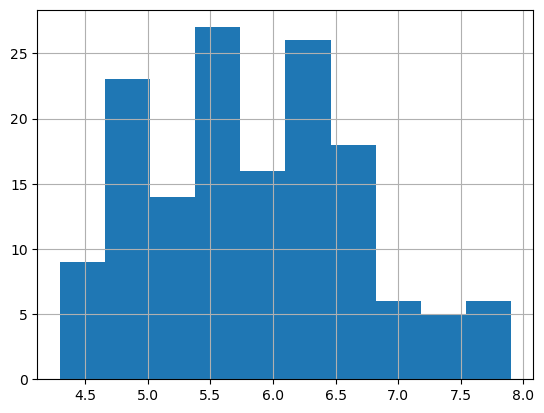

In [7]:
#ANALYSING THE DATA USING EDA
df['sepal_length'].hist()

<Axes: >

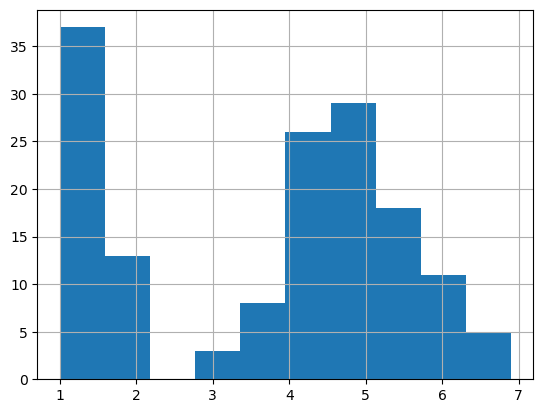

In [8]:
df['petal_length'].hist()

<Axes: >

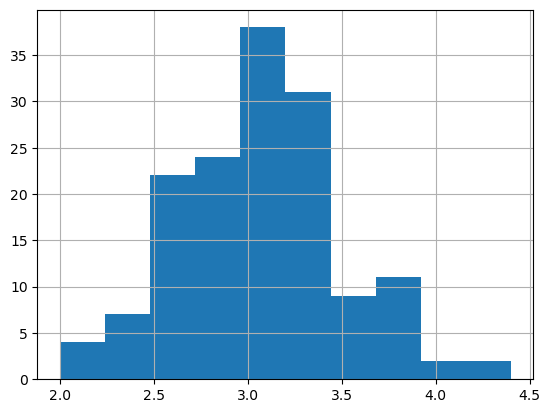

In [9]:
df['sepal_width'].hist()

<Axes: >

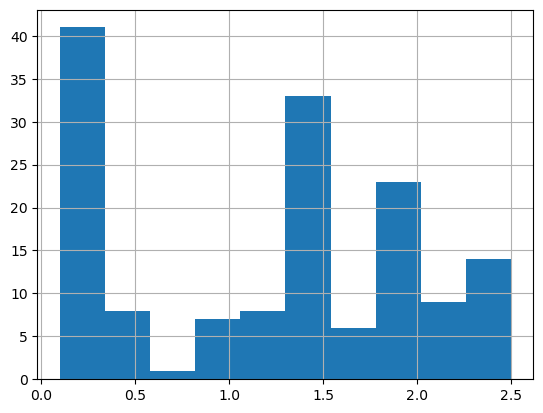

In [10]:
df['petal_width'].hist()

In [11]:
#scatter plot
clr=['blue','magenta','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

In [12]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

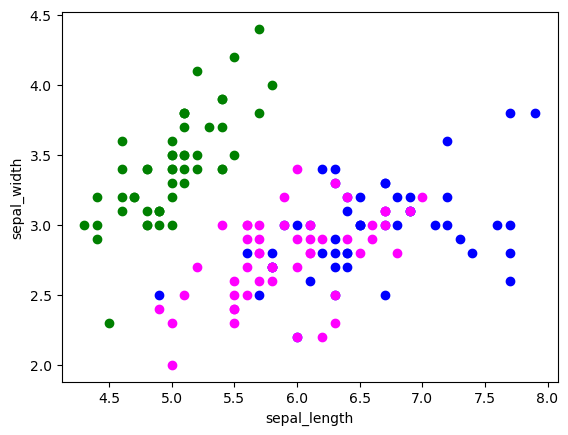

In [13]:
#FOR SEPAL LENGTH AND WIDTH
for i in range(0,3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=clr[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

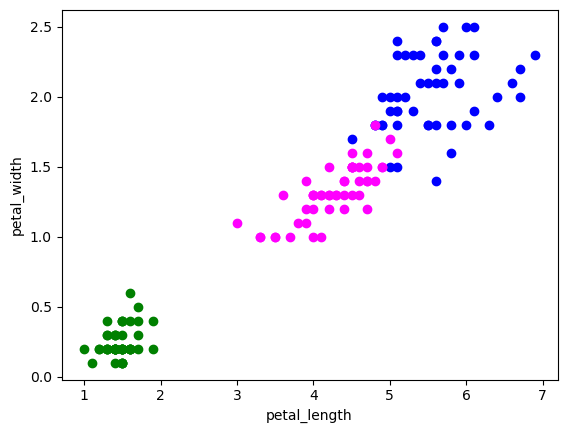

In [15]:
#SIMILARLY FOR PETAL
for i in range(0,3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=clr[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend

In [16]:
#CORRELATION MATRIX---basically it tells about the correlation between two variables it ranges from -1 to 1
#if there is very high correlation we can drop them
X=df.drop(['species'],axis=1)

In [17]:
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
#checking if there are null values or not 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
#we need to change the species column to numeric form
sp={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['species']=df['species'].map(sp)

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop(columns=['species'])
Y=df['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score

In [33]:
#model evaluation on testing data
X_test_pred=model.predict(X_test)
testingaccuracy=accuracy_score(Y_test,X_test_pred)
print('USING LOGISTIC REGRESSION ALGORITHM:',testingaccuracy*100)

USING LOGISTIC REGRESSION ALGORITHM: 100.0


In [28]:
#testing it through another algorithm
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [31]:
print("USING KNeighbors classifier algorithm",model.score(X_test,Y_test)*100)

USING KNeighbors classifier algorithm 100.0
